### 초평면으로부터의 거리
 - 평면의 방향과 포인트와의 내적으로 계산

In [4]:
# normalize는 방향으로 표현 (크기로 나눔)
import numpy as np
w = np.array([3, 4])  # 방향이 아니라 포인트임. 방향으로 바꿔주기 위해 크기로 나눠줘야 함.

b = -10

x0 = np.array([2, 3])
distance = abs(np.dot(w, x0) + b) / np.linalg.norm(w)
print(f"점 {x0}과 초평면 사이의 거리: {distance:.4f}")

# 확률 값으로 맵핑: 0 ~ 1 사이 값으로 출력(확률)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
probability = sigmoid(distance)
print(f"확률 변환 값(시그모이드): {probability:.4f}")

점 [2 3]과 초평면 사이의 거리: 1.6000
확률 변환 값(시그모이드): 0.8320


# 결정함수

첫 번째 샘플의 결정함수 값: -0.32724054770770267


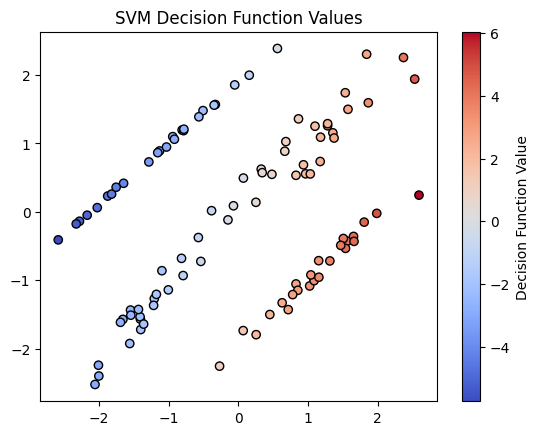

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

svm_model = SVC(kernel='linear')  # Classifier 분류기
svm_model.fit(X, y)

decision_values = svm_model.decision_function(X)

# 2진 분류  # A, B (-가 나오면 B를 선택, 양수가 나오면 A를 선택)
print("첫 번째 샘플의 결정함수 값:", decision_values[0])
plt.scatter(X[:, 0], X[:, 1], c = decision_values, cmap = "coolwarm", edgecolors='k')
plt.colorbar(label = 'Decision Function Value')
plt.title('SVM Decision Function Values')
plt.show()

# XOR 문제 실행

In [9]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)  # 정규분포는 +, -  # xor: 두 데이터가 다를 때
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
print(y_xor)

# 1, 0 -> SVM에서는 목적함수를 간단하게 하기 위해 라벨링을 1과 -1로 한다.
y_xor = np.where(y_xor, 1, -1)
y_xor

[False False  True  True  True False False False  True  True  True  True
  True  True False False False  True False False False  True False  True
 False  True False  True False False False False  True  True  True False
  True  True False  True  True  True False  True  True  True False False
 False False  True  True  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True  True False
 False  True False  True False False  True False  True False  True False
 False False  True  True False  True False False  True  True  True  True
 False  True False False False False  True False  True False  True False
  True  True False  True  True False False False  True  True  True False
 False False False False False  True  True False False  True False False
  True False  True  True False False  True  True  True  True False  True
 False False  True  True False  True  True False  True False  True  True
 False  True False False False  True False  True  T

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1])

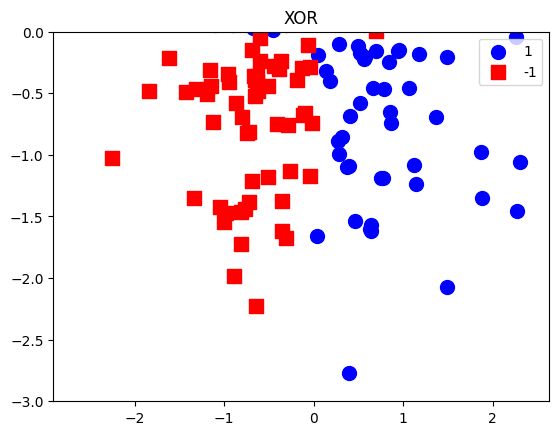

In [10]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], label='1', marker='o', c = 'b', s = 100)
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1', s = 100)
plt.ylim(-3, 0)
plt.legend()
plt.title('XOR')
plt.show()

# 결정 경계 그리는 함수

In [11]:
def plot_xor(X, y, model, title, xmin = -3, xmax = 3, ymin = -3, ymax = 3):
  # grid 그물망 격자 (가운데 원점 (0, 0))
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                       np.arange(ymin, ymax, (ymax-ymin)/1000))

  # XX, YY -> X축 백만개, Y축 백만개  # 예측 값을 높이 값으로 함.
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)  # 1차원으로 만들어줌.

  # 등고선을 그리는데 fill하라 (선으로 그려지는 게 아닌, 면으로 그려진다.)
  plt.contourf(XX, YY, ZZ, alpha = 0.5)
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'b', marker = 'o', label = '+1', s = 100)
  plt.scatter(X[y == -1, 0], X[y == -1, 1], c= 'r', marker = 's', label = '-1', s = 100)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.show()

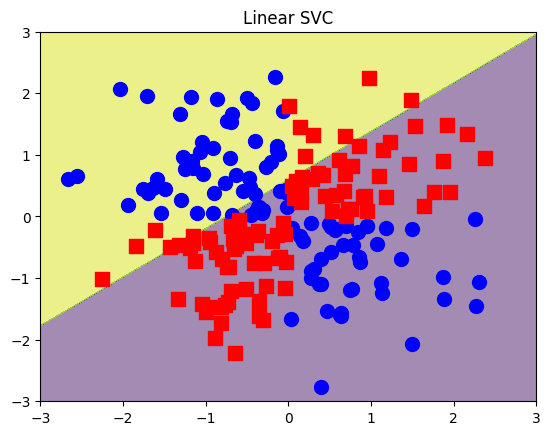

In [12]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear').fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, 'Linear SVC')

In [13]:
# 데이터 사용자 정의 함수를 적용하는 함수
# 데이터를 고차원으로 변환 (Kernel Trick)
from sklearn.preprocessing import FunctionTransformer
def basis(X):
  return np.vstack([X[:, 0] ** 2, np.sqrt(2) * X[:, 0] * X[:, 1],
                    X[:, 1] ** 2]).T

In [14]:
X = np.arange(8).reshape(4, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [15]:
FunctionTransformer(basis).fit_transform(X)  # 차원 변환을 하라는 소리

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ],
       [36.        , 59.39696962, 49.        ]])

# 함수 적용 결과

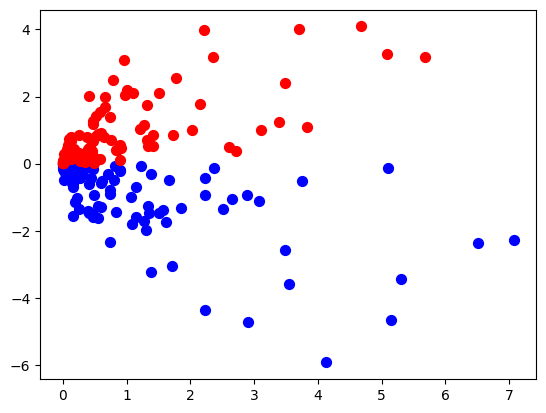

In [16]:
# 전체 데이터 형태를 생각하라
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c = 'b', s = 50)
plt.scatter(X_xor2[y_xor == -1, 0], X_xor2[y_xor == -1, 1], c = 'r', s = 50)
plt.show()

# 모델에 적용

In [17]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


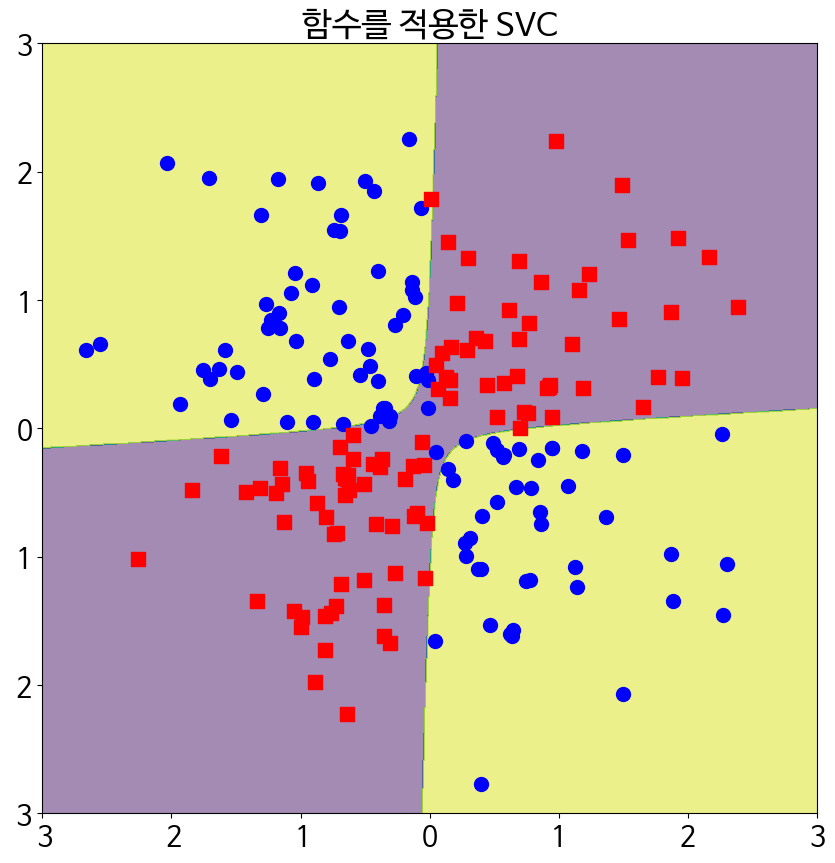

In [18]:
from sklearn.pipeline import Pipeline  # Pipeline: 한 방에 묶어서 처리한다.
basismodel = Pipeline([('basis', FunctionTransformer(basis)),
                       ('svc', SVC(kernel = 'linear'))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, '함수를 적용한 SVC')

# 커널 적용
 - Polynomial kernel을 적용하고 있음.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


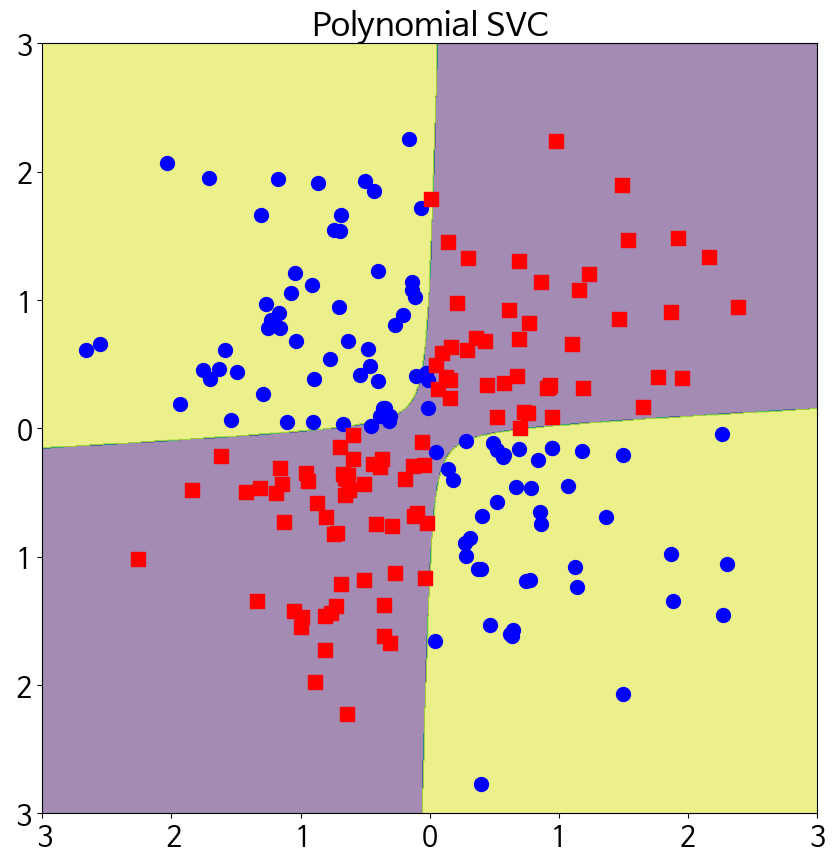

In [19]:
polysvc = SVC(kernel = 'poly', degree = 2, gamma = 1, coef0 = 0).fit(X_xor, y_xor)  # 2차원으로 변경 # gamma는 1 주고.
plot_xor(X_xor, y_xor, polysvc, 'Polynomial SVC')

### RBF kernel 적용

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


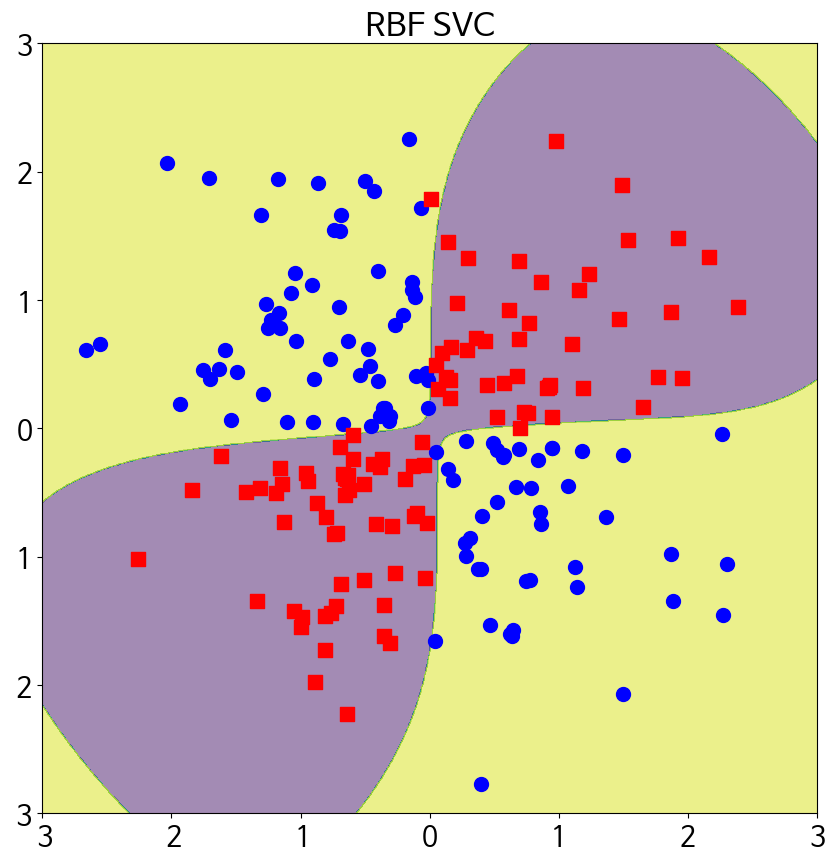

In [20]:
rbfsvc = SVC(kernel='rbf').fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, rbfsvc, 'RBF SVC')

### Sigmoid kernel 적용

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


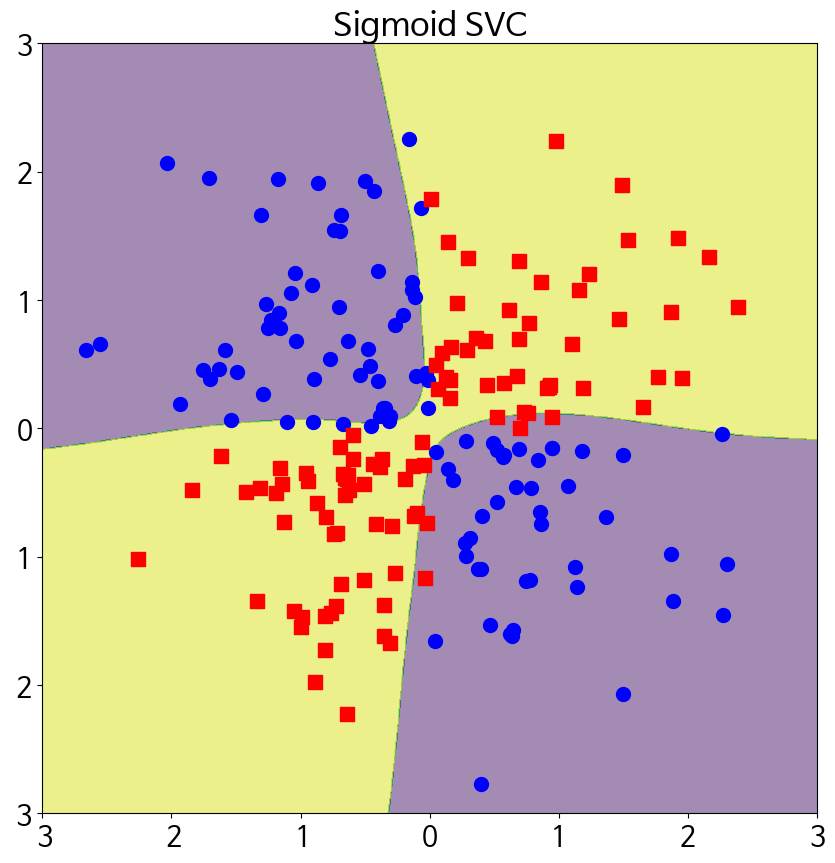

In [21]:
sigmoidsvc = SVC(kernel='sigmoid', gamma = 2, coef0 = 2).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, sigmoidsvc, 'Sigmoid SVC')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


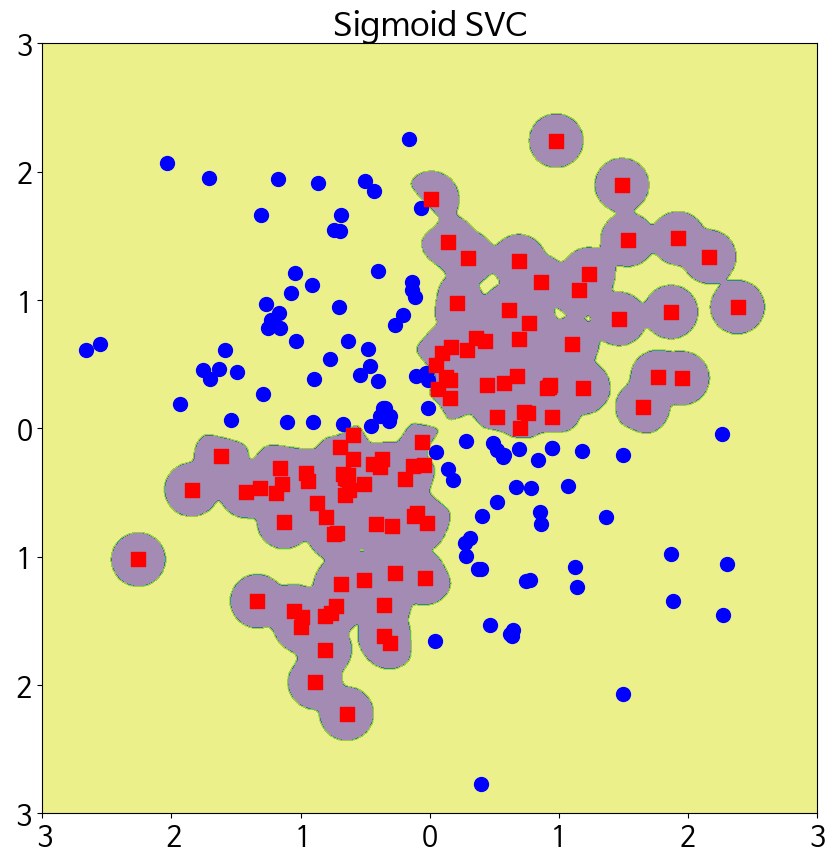

In [22]:
from sklearn.model_selection import GridSearchCV
param_grids = {'C': [1e0, 1e1], "gamma": np.logspace(-2, 2, 2), "kernel": ['linear', 'sigmoid', 'rbf', 'poly']}

svr = GridSearchCV(SVC(kernel = 'sigmoid', gamma = 0.1), cv = 3, param_grid = param_grids)

svr.fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svr.best_estimator_, 'Sigmoid SVC')

# C 값과 gamma 값 규제
 - C 값:
          * 커지면 오류를 허용하지 않는 모델 (과적합)
          * 작아지면 오류를 허용하는 모델 (과소적합)
 - gamma 값:

          * 커널의 영향 범위를 조절
          * 하나의 데이터 포인터 영향력 결정
          * 작아지면 경계가 부드러워지고, 성능이 좋아짐.
          * 커지면 경계가 날카로워지고, 과적합이 될 수 있음.
          * 초평면의 모양에 영향을 준다.

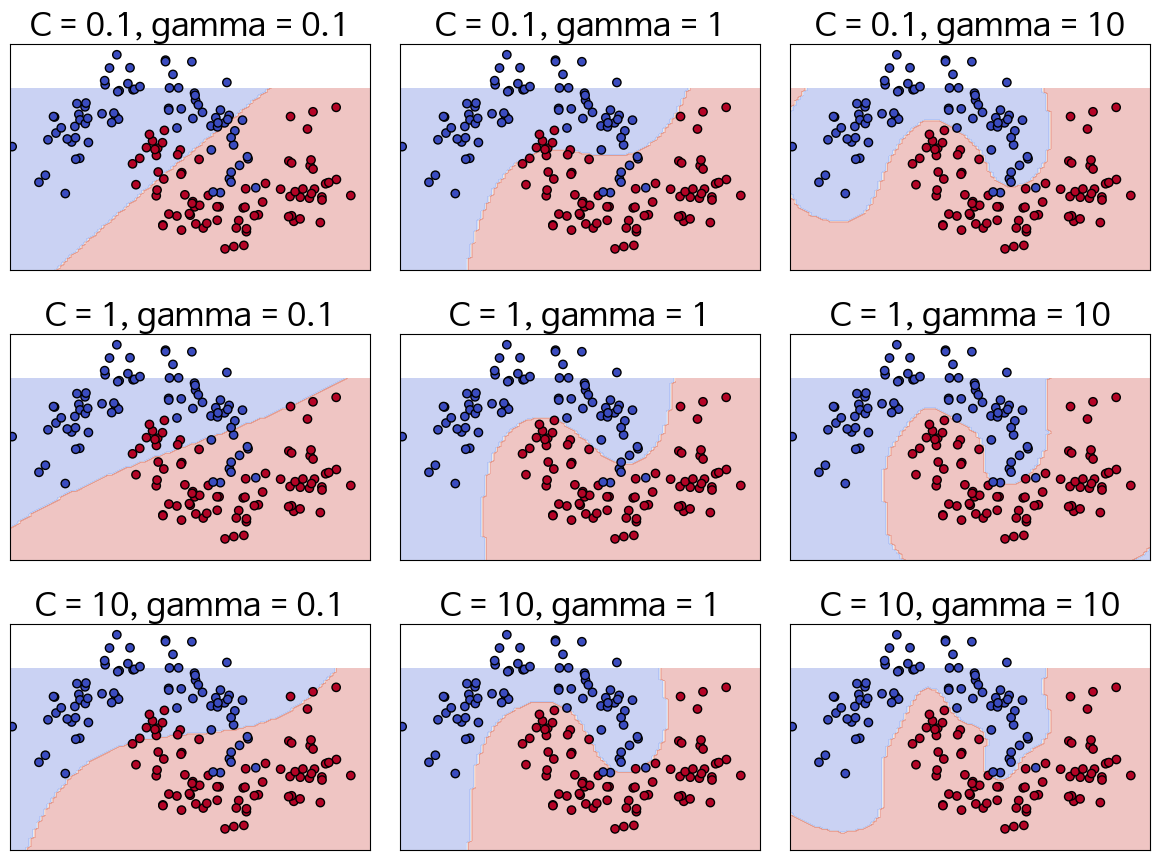

In [23]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 200, noise = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize = (12, 9))

for i, C in enumerate(C_values):
  for j, gamma in enumerate(gamma_values):
    model = SVC(kernel = 'rbf', C = C, gamma = gamma)
    model.fit(X_train, y_train)
    ax = axes[i, j]
    ax.set_title(f'C = {C}, gamma = {gamma}')

    # 경계선을 출력
    xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha = 0.3, cmap = plt.cm.coolwarm)
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, edgecolors = 'k', cmap = plt.cm.coolwarm)
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()
plt.show()

### 문제1

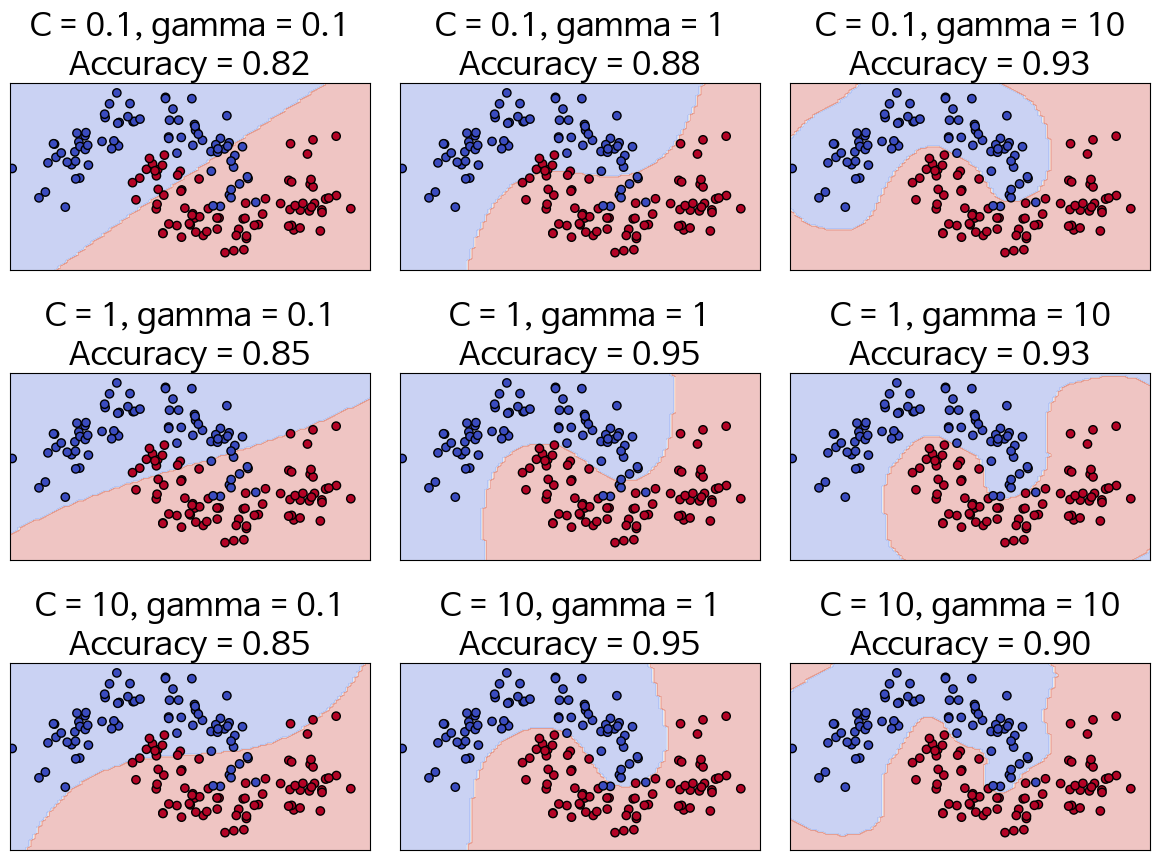

In [24]:
# 각 규제의 조합에 test 데이터에 대한 평가를 진행하고, 시각화된 그래프 위에 정확도를 출력하시오.

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 및 분리
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 값 설정
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]

# 그래프 설정
fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(12, 9))

# C와 gamma 조합에 대해 반복
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # 모델 생성 및 학습
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        #train_accuracy = accuracy_score(y_train, model.predict(X_train))
        #test_accuracy = accuracy_score(y_test, model.predict(X_test))

        # 테스트 데이터 정확도 계산
        accuracy = model.score(X_test, y_test)

        # 경계선 그리기
        ax = axes[i, j]
        #ax.set_title(f'C={C}, gamma = {gamma} \n)
        #Train Acc: {train_accuracy:.2f}, Test Acc: {test_accuracy:.2f}', fontsize = 9)
        xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

        # 학습 데이터 시각화
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)

        # 정확도 출력
        ax.set_title(f'C = {C}, gamma = {gamma}\nAccuracy = {accuracy:.2f}')
        ax.set_xticks(())
        ax.set_yticks(())

# 그래프 정렬 및 표시
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
import time

X, y = make_classification(n_samples = 10000, n_features = 20, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# SVM은 왜 정규화가 중요할까? -> 기본적인 SVM은 거리기반! 초평면으로부터 거리값을 구함.
# Scaling을 꼭 해줘야 함.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scv = SVC(kernel = 'linear')  # 커널: 선형 커널
start = time.time()
svc.fit(X_train_scaled, y_train)
end = time.time()
print(f'SVC(Linear Kernel) 학습 시간: {end - start:.4f}초')
# 1차 정규화만 진행해서 속도가 빠르다.

linear_svc = LinearSVC()
start = time.time()

linear_svc.fit(X_train_scaled, y_train)
end = time.time()
print(f"Linear SVC 학습 시간: {end - start:.4f}초")

SVC(Linear Kernel) 학습 시간: 2.7348초
Linear SVC 학습 시간: 0.0290초


### 문제 2

In [26]:
# 두 모델의 test 데이터에 대해 평가 결과를 출력하시오.

from sklearn.metrics import accuracy_score

svc_test_acc = accuracy_score(y_test, svc.predict(X_test_scaled))
print(f"SVC(Linear Kernel) 정확도 - Test: {svc_test_acc:.4f}")

linear_svc_test_acc = accuracy_score(y_test, linear_svc.predict(X_test_scaled))
print(f"LinearSVC 정확도 - Test: {linear_svc_test_acc:.4f}")

SVC(Linear Kernel) 정확도 - Test: 0.8930
LinearSVC 정확도 - Test: 0.8940


# 비지도 학습 -> 이상 탐지
 - SVM은 라벨을 1, -1로 줌.
 - -1: 오분류 되었다는 의미
 - 정상 데이터로만 학습을 해도, 오분류될 가능성 있음.

In [27]:
import numpy as np
from sklearn import svm

np.random.seed(42)

## 정상 학습 데이터 생성
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]  # numpy 배열 결합 (row)  # 100개의 데이터

## 테스트 데이터 생성
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]   # 20개의 데이터

## 이상치 데이터 생성
X_outliers = np.random.uniform(low = -4, high = 4, size = (20, 2))

## 정상 데이터를 학습  # nu가 높아지면 정확한 모델을 (hard margin) 도출함.
# 오류를 허용하고 일반화된 모델은 soft model이라고 함.~
clf = svm.OneClassSVM(nu = 0.1, kernel = 'rbf', gamma = 0.1)  # 0.05, 0.01 해보면.. 결과 값 바뀜
clf.fit(X_train)  # 정상 데이터로만 구성

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == -1].size

print(n_error_train)  # 19개  # 21개
print(n_error_test)  # 3개  # 7개
print(n_error_outliers)  # 20개  # 20개

# 정상 데이터 중에 오분류된 데이터에 대한 데이터 분석이 필요
# nu 값을 조정해서 이상치 데이터가 확실하게 구분되도록 튜닝해야 함.

21
7
20


# 오후 시작

### 문제 3

In [33]:
## 이상탐지 모델
# OneClassSVM을 다음 파라미터 범위에서 RandomizedSearchCV를 이용해서 최적화하시오.

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "nu": np.linspace(0.01, 0.2, 10),
    "gamma": np.logspace(-3, 0, 10),
}

# 최적의 이상탐지 모델을 만들어 보시오.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "nu": np.linspace(0.01, 0.2, 10),
    "gamma": np.logspace(-3, 0, 10),
}

# OneClassSVM을 다음 파라미터 범위에서 RandomizedSearchCV를 이용해서 최적화하시오.

OneClassSVM_model = RandomizedSearchCV(
    estimator = OneClassSVM(),
    param_distributions = param)



In [30]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.datasets import make_blobs
from sklearn.metrics import f1_score

# 샘플 데이터 생성
X, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.5, random_state=42)

# 하이퍼파라미터 탐색 범위 설정
param_distributions = {
    "nu": np.linspace(0.01, 0.2, 10),
    "gamma": np.logspace(-3, 0, 10)
}

# OneClassSVM 모델 정의
model = OneClassSVM(kernel="rbf")

# 사용자 정의 평가 함수 정의
def custom_score(y_true, y_pred):
    # 정답 레이블(y_true)을 1로 간주하고 F1 스코어를 계산
    return f1_score(y_true, y_pred)

# 적합한 Scorer 생성
scorer = make_scorer(custom_score)

# RandomizedSearchCV로 최적화
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,
    scoring=custom_score
)

# 모델 학습
random_search.fit(X)

# 최적의 하이퍼파라미터 및 결과 출력
print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최적의 점수:", random_search.best_score_)

# 최적화된 모델
best_model = random_search.best_estimator_

최적의 하이퍼파라미터: {'nu': 0.01, 'gamma': 0.21544346900318823}
최적의 점수: nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-30-141e9b0ffe3b>", line 23, in custom_score
    return f1_score(y_true, y_pred)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 206, in wrapper
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'y_true' parameter of f1_score must be an 

In [34]:
## 강사님 정답

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# 비지도학습 - label이 없음 (평가 함수를 작성)
# OneClassSVM: 정상  # 이상치 -1  # 1.0으로 판단
# F1 score: 조화평균 (정밀도 / recall(재현율))
# precision(정밀도): positive 예측한 것이 얼마나 잘 맞추었는가
# recall(재현율): 실제 positive인 것을 얼마나 잘 맞추었는가

# 비지도 학습의 평가 방법은 accuracy가 아니라 f1_score가 적당하다.

# 평가 함수 생성
def f1_score(clf, X_train, X_outliers):
  y_pred_train = clf.predict(X_train)
  y_pred_outliers = clf.predict(X_outliers)

  y_true = np.hstack([np.ones(len(X_train)), -1 * np.ones(len(X_outliers))])
  y_pred = np.hstack([y_pred_train, y_pred_outliers])
  return f1_score(y_true, y_pred, pos_label=-1)

In [35]:
random_search = RandomizedSearchCV(
    estimator=svm.OneClassSVM(kernel = 'rbf'),
    param_distributions = param_distributions,
    n_iter = 20,
    scoring = make_scorer(f1_score, X_train = X_train, X_outliers = X_outliers),
    cv = 3,
    verbose = 2,  # 모델이 학습과정을 얼마 설명하면서 실행 것
    n_jobs = -1
)

random_search.fit(X_train)
print("\n최적 하이퍼파라미터:", random_search.best_params_) # 평가가 Nan으로 출력됨.

Fitting 3 folds for each of 20 candidates, totalling 60 fits

최적 하이퍼파라미터: {'nu': 0.07333333333333333, 'gamma': 1.0}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


### 일단 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


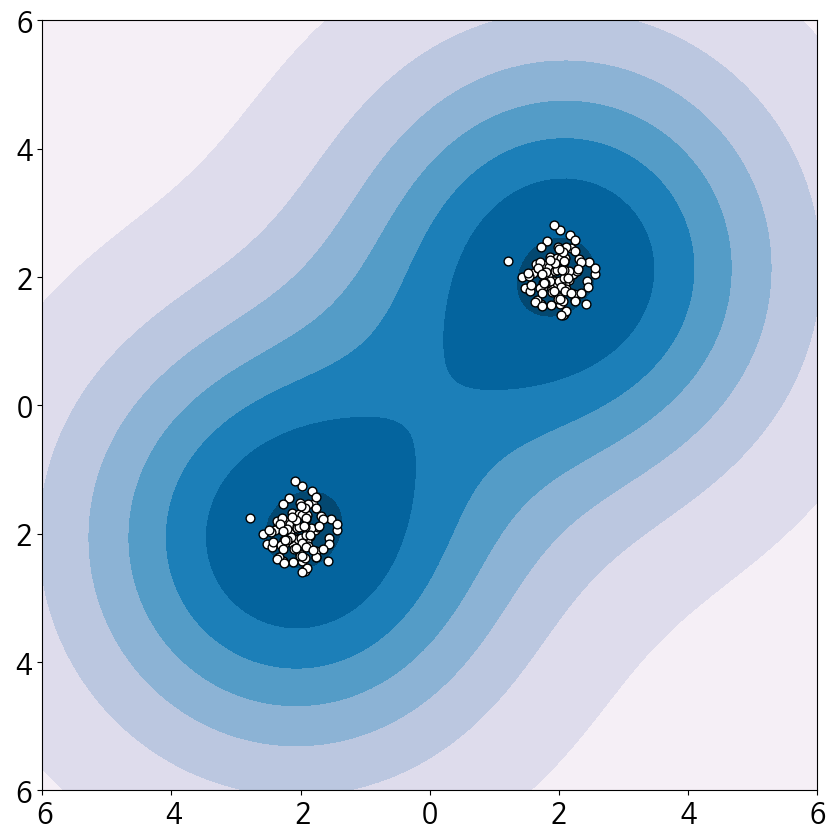

In [36]:
# 정상 데이터는 2개의 중심으로 ...
from sklearn.inspection import DecisionBoundaryDisplay
_, ax = plt.subplots()

# 경계선을 작도하기 위해서
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis = 1)

# 경계선을 그려주는 함수
DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method = 'decision_function',
    plot_method = 'contourf', ax=ax, cmap = 'PuBu',
)

s = 40
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], c = 'white', s=s, edgecolors='k')
plt.show

# 다중 분류
 - one vs one (ovo)
 - one vs rest (ovr)

1. OVO

In [38]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 기본이 ovo (특별한 세팅 없음)
# ABC: A, B 모델 / A, C 모델 / B, C 모델 (자동으로 내부적으로 만듦.)
svm_model = SVC(kernel = 'linear', C = 1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'SVM 다중 분류 정확도: {accuracy:.4f}')

SVM 다중 분류 정확도: 1.0000


2. OVR

In [40]:
from sklearn.multiclass import OneVsRestClassifier

# 3개의 모델을 만듦. (기본은 이진 분류 -> Hinge.Loss를 사용하기 때문)
# A, (B, C)  # 선택 방식 결정함수가 +가 나오면 앞에 거가 선택됨 (- 나오면 뒤에 꺼 선택)
# B, (A, C)
# C, (A, B)
ovr_model = OneVsRestClassifier(LinearSVC())
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'SVM 다중 분류 정확도 (OvR): {accuracy_ovr:.4f}')

SVM 다중 분류 정확도 (OvR): 1.0000


### hinge를 확장한 Crammer-Singer Loss 함수

In [41]:
# LinearSVC 선형에서만 사용 가능

from sklearn.svm import LinearSVC

# 가장 작은 값 선택  # crammer_singer
svm_crammer_singer = LinearSVC(multi_class = 'crammer_singer')
svm_crammer_singer.fit(X_train, y_train)

y_pred_cs = svm_crammer_singer.predict(X_test)
accuracy_cs = accuracy_score(y_test, y_pred_cs)

print(f"SVM 다중 분류 정확도 (Crammer-Singer): {accuracy_cs:.4f}")

SVM 다중 분류 정확도 (Crammer-Singer): 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Hinge.Loss

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


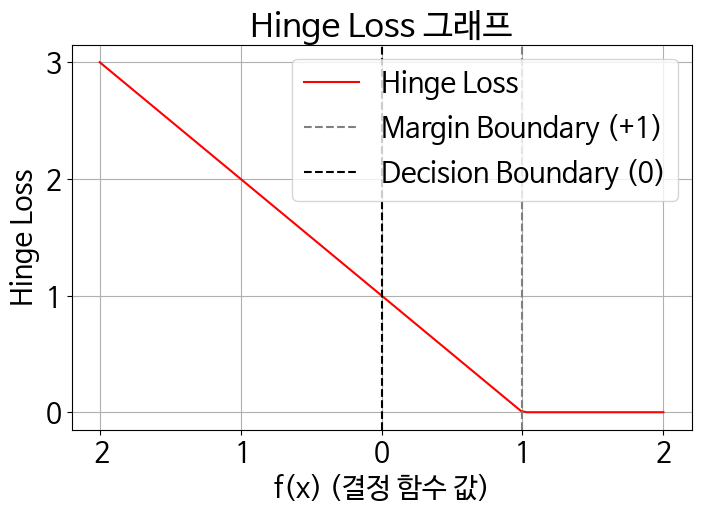

In [42]:
fx = np.linspace(-2, 2, 100)
hinge_loss = np.maximum(0, 1 - fx)

plt.figure(figsize = (8, 5))
plt.plot(fx, hinge_loss, label = 'Hinge Loss', color = 'red')

# support vector 경계선 (2개 일 때는 직선)
plt.axvline(x = 1, color = 'gray', linestyle = '--', label = 'Margin Boundary (+1)')

# 결정 경계
plt.axvline(x = 0, color = 'black', linestyle = '--', label = 'Decision Boundary (0)')

plt.xlabel('f(x) (결정 함수 값)')
plt.ylabel('Hinge Loss')
plt.title('Hinge Loss 그래프')
plt.legend()
plt.grid()
plt.show()

### SVM을 마무리하는 문제

In [43]:
# load_breast_cancer 로딩
# 데이터 분할
# 판별모델 SVC 사용
# 차원 축소를 해서 2차원으로 변환하고, DecisionBoundaryDisplay 경계선 출력
# 차원 축소된 데이터를 출력해서 시각화 진행
# 테스트 평가 결과를 출력하시오.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [44]:
# 데이터 로드 및 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SVC 모델 생성 및 학습
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# 차원 축소 (PCA, 2차원 변환)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# SVC 모델 재학습 (차원 축소 데이터 사용)
model_pca = SVC(kernel='linear', random_state=42)
model_pca.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


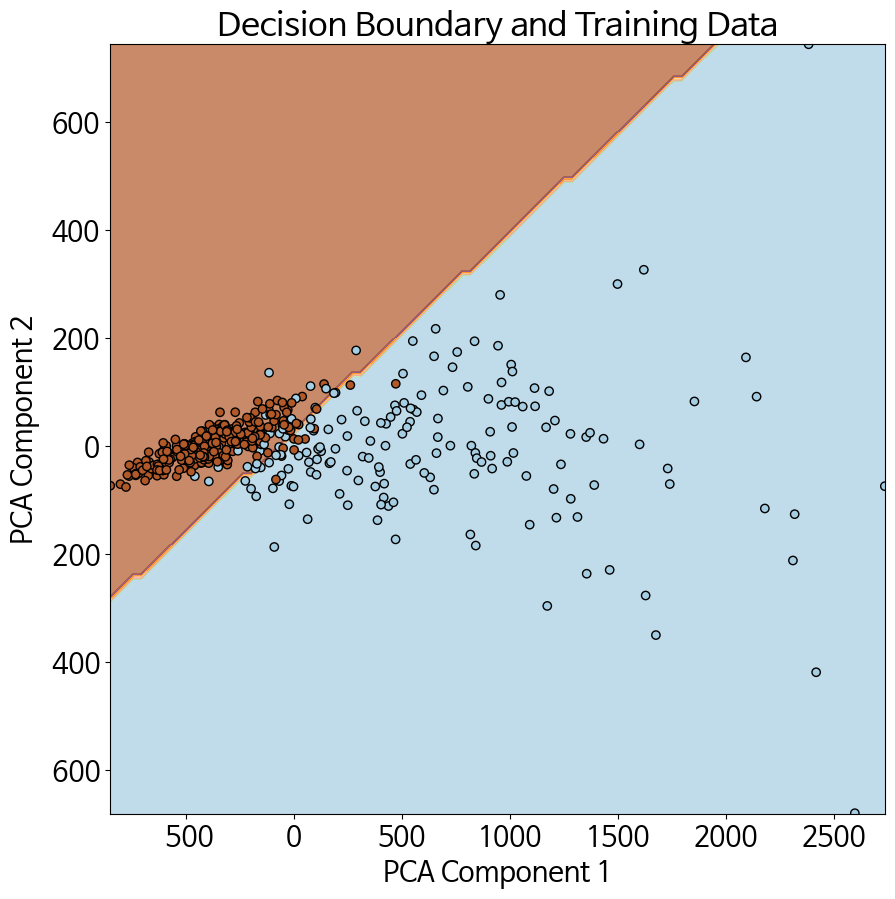

In [45]:
# 경계선 출력

plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    model_pca, X_train_pca, response_method="predict", cmap=plt.cm.Paired, alpha=0.7
)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Decision Boundary and Training Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

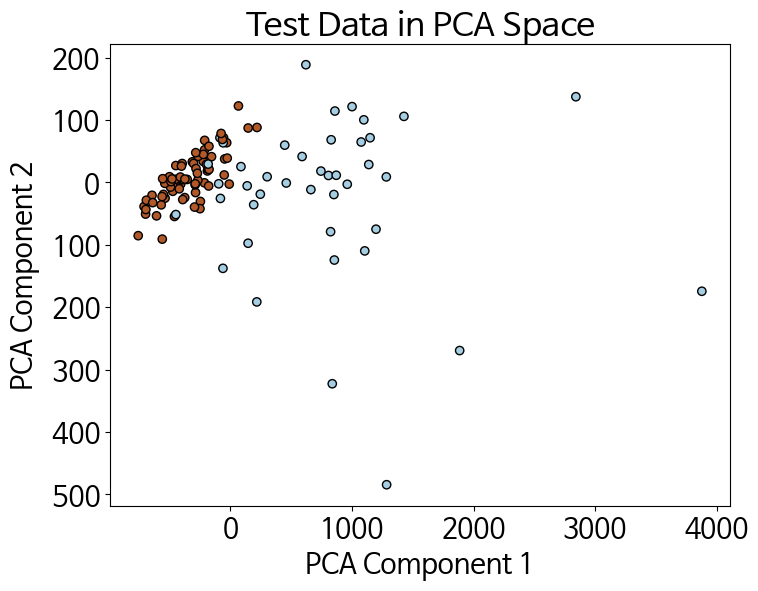

In [46]:
# 테스트 데이터 시각화

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolor="k", cmap=plt.cm.Paired)
plt.title("Test Data in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [48]:
# 테스트 평가 결과

y_pred = model_pca.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 데이터 정확도: {accuracy:.4f}")  # 2

테스트 데이터 정확도: 0.9386
